In [1]:
!pip3 install numpy matplotlib autograd

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


# Regression

**Goal**: teach computer to predict a numerical value given some input

**Model**. Consider approach based on regression analyis.
[Regression analysis](https://en.wikipedia.org/wiki/Regression_analysis) is a statistical technique to estimate dependence between variables. 
Suppose we have samples $x_n$ of a random value $X$ and the corresponding samples $y_n$ of a random value $Y$.
We assume $Y$ is a function $f$ of $X$ plus an error term independent of $X$:

$$
Y=f(X;\theta)+W.
$$

The function $f$ defines possible relationship between the variables and the parameters $\theta$ controls exact form of the dependence.


**Example 1.** Implement in Python function to sample the function $y=\sin x$ with addition of normally distributed noise. 

In [2]:
# import numpy as np
import autograd as ag
import autograd.numpy as np
import matplotlib.pyplot as plt

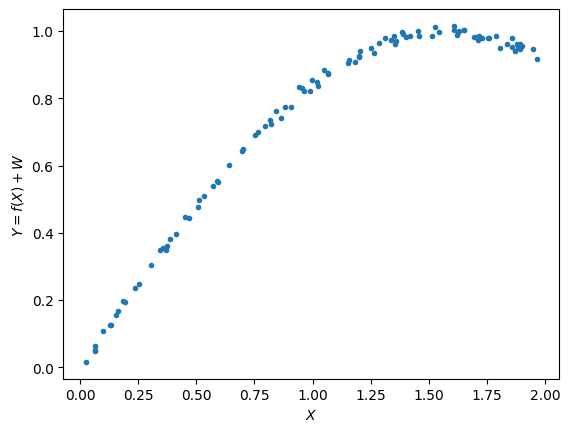

In [3]:
S = 100 # sample size
X = np.random.rand(S)*2 # inicialise X array
# print(f'min X = {np.min(X)}, max X = {np.max(X)}') 

W = np.random.randn(S)*0.01 # initialize noise
Y = np.sin(X) + W # create Y samples as sin function with noise
plt.plot(X,Y, '.') # ploting samples
plt.xlabel('$X$')
plt.ylabel('$Y=f(X)+W$')
plt.show()

**Approaches**. In fact as far as we need to find best function that approximate input, we will solve an optimization problem. Thus we need to define something to optimize. Mainly two functions are used: **loss** and **likelihood** functions.

**Minimum loss function principle**.
Function $f$ is a solution controlled by the parameter $\theta$. The optimal $\theta$ provides the best fitting function. To find optimal value we need to solve optimization problem or find minimum of some error function. Define **Loss function**:

$$
R[x,y] = ||y - f(x,\theta)||^2
$$

The solution of optimisation problem is $\theta_{opt} = \mathrm{argmin}_\theta(L)$

In practice, the estimate of $\theta$ is obtained by the [least squares method](https://en.wikipedia.org/wiki/Least_squares)
from minimization of the mean square error:

$$
R[\theta] = \sum_n (y_n-f(x_n,\theta))^2.
$$

The minimum of $R$ can be found from the necessary condition of optimality, which is sufficient in the case of quadratic functional:

$$
\frac{\partial R}{\partial\theta_k} = 2\sum_n(y_n-f(x_n,\theta_k))\frac{\partial f}{\partial \theta_k}(x_n,\theta) = 0\forall k.
$$

**Example 2.** Implement a function that solve linear least squares method for decomposition of $y$ over polynomials of degree $D$
on the interval $[0,1]$
using Moore-Penrose inverse:

$$
f(x,\theta)=\sum_{k=0}^D \theta_k x^k.
$$ 


In [4]:
def f(x, theta):
  xn = np.power(x, np.arange(len(theta)))
  return np.dot(xn, theta)

# theta =                 1, x, x^2, x^3,    x^4,    x^5
theta_optimal = np.array([0, 1,   0,-1/2/3,   0, 1/2/3/4/5])

x0 = 0.1 
print(x0, f(x0,theta_optimal), np.sin(x0))

0.1 0.09983341666666667 0.09983341664682815


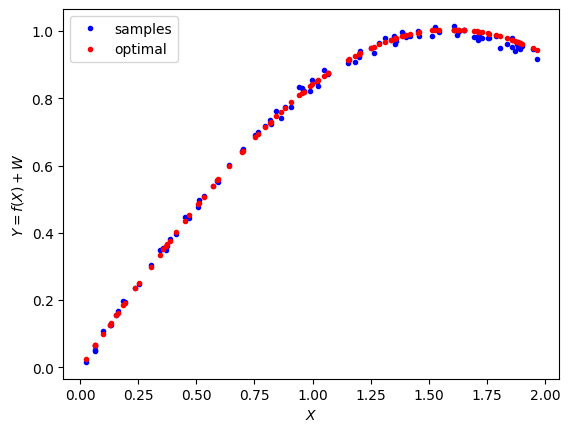

In [5]:
def F(x, D): # basis
  """
  Arguments:
    D - number of parameters.
  """
  return np.power(x[:,None], np.arange(D)[None,:])

def f(x, theta):
  # axis 0 = # sample
  # axis 1 = monomial degree
  xn = F(x, D=len(theta))
  return np.dot(xn, theta)

y_optimal = f(X, theta_optimal)

plt.plot(X,Y, '.b', label='samples')
plt.plot(X,y_optimal, '.r', label='optimal')
plt.xlabel('$X$')
plt.ylabel('$Y=f(X)+W$')
plt.legend()
plt.show()

**Example 3**. Calculate mean square error for obtained solution.

In [6]:
def R(theta, x, y):
  rn = (y - f(x, theta))**2
  return np.sum(rn)

print('Mean square error', R(theta=theta_optimal, x=X, y=Y)/np.sqrt(S) )

Mean square error 0.0013844812974058726


1. если шум - иуультипликативен (умноается, а не прибавляется), то какая лосс функиця опишет модель наилучшим образом. 



**Maximum likelihood principle**. Another way to approach machine learning problem is a search of maximum of some likelihood function. Likelihood function function is a probability of specific outcome. 
Given probability density $f_W$ for random noise $W$, we can estimate likelihood of outcomes resulting in samples $(x_n,y_n)$.
[Likelihood function](https://en.wikipedia.org/wiki/Likelihood_function) for the continuous destribution can be written as follows:
$$
L(\theta|x,y) = \prod_n f_W(y_n-f(x_n,\theta)). 
$$

$$
\log L(\theta|x,y) = \sum_n \log f_W(y_n-f(x_n,\theta)). 
$$

Maximum of the likelihood function corresponds to the value of $\theta$ such that outcomes $(x_n,y_n)$ are most probable,
thus we obtain the maximum likelihood estimate for the parameters 

$$
\hat\theta = \mathrm{argmax}_\theta \log L(\theta|x,y).
$$

**Problem 1.** Which distribution of $W$ does correspond to least squares method (minimum of mean square error coincides with maximum of likelihood function)?


Let's assume that normal distribution in **MLP** corresponds to **LMS**.
$$
f_W(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{x^2}{2\sigma^2}\right)
$$
Substituting the normal distribution density function in **MLP** :
$$
L(\theta|x, y) = \prod_{n=1}^N \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(y_n - f(x_n, \theta))^2}{2\sigma^2}\right).
$$

Lets consider the logarithm of the likelihood function:
$$
\log L(\theta|x, y) = \sum_{n=1}^N \log\left(\frac{1}{\sqrt{2\pi\sigma^2}}\right) - \frac{1}{2\sigma^2} \sum_{n=1}^N (y_n - f(x_n; \theta))^2.
$$
Simplifying:
$$
\log L(\theta|x, y) = -\frac{N}{2} \log(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{n=1}^N (y_n - f(x_n; \theta))^2.
$$

So maximizing likehood function  corresponds to minimizing the sum of squared residuals:
$$
\mathrm{argmax}_\theta \log L(\theta|x, y) \equiv \mathrm{argmin}_\theta \sum_{n=1}^N (y_n - f(x_n; \theta))^2.
$$




**Training**.
From the point of view of machine learning (ML), the function $R$ is a loss function measuring performance of the artificial neural network (ANN) $f$ with parameters $\theta$. 
The network is used to predict the value of $Y$ given a value of $X$.  
In the context of ML the optimization of $\theta$ above is called training of the algorithm/network.

The simplest method to train an algorithm is the [steepest gradient method](https://en.wikipedia.org/wiki/Gradient_descent).
Given an initial vector of parameters $\theta$, the parameters are updated on each step of optimization by the formula:

$$
\theta\mapsto \theta-\alpha\frac{\partial R}{\partial\theta}[\theta],
$$
until the method converges, i.e. the stop conditions are satisfied, e.g. the loss $R$ is small enough,
or its update $\partial R/\partial \theta$ is small.
The parameter $\alpha$ is learning rate in ML or step size in the numerical methods, it is a metaparameter, i.e. it does not belong to the model, but may affect the result of optimization. 
In the simplest form of the gradient descend the learning rate is constant, however often sofisticated method of variation of $\alpha$ are required 
to stabilze the method or improve convergence, e.g. [Adam method](https://en.wikipedia.org/wiki/Stochastic_gradient_descent#Adam).
Higher order method, such as [LBFGS](https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm), can also be used to improve convergence, however the methods are used less often.

The number of samples sometimes much larger than required to estimate the direction of optimization reliably,
in the case the extra points only slow down the computation of the gradient.
Therefore [stochastic gradient descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) is commonly used in ML instead of the gradient method.
In the method only a subset (batch) of the samples is used to compute the gradient of loss,
the batch is regenerated/resampled after few iterations of optimization. 


The most well-known variant of the least square method is the linear one/linear regression.
In the case prediction function $f$ depends on $\theta$ linearly:

$$
f(x,\theta)=\sum_k f_k(x)\theta_k,
$$
where $f_k$ is a set of predefined functions forming a basis (for instance, in **Example 2** we used the basis of polynomials).
Then optimality conditions takes form of a linear system with respect to $\theta$:

$$
\frac{\partial R}{\partial\theta_k} = 2\sum_n\bigg(y_n-\sum_j f_j(x_n)\theta_j\bigg)f_k(x_n) = 0\forall k.
$$

$$
F^T y - F^T F \theta = 0,
$$
where $F$ is a matrix with elements $F_{nk}=f_k(x_n)$

$$
F^T F \theta=F^T y.
$$
The solution to the problem is given by the [Moore-Penrose inverse](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse) of the matrix $F$:

$$
\hat \theta=(F^T F)^{-1}(F^T y).
$$ 
Numerically the solution can be computed without computation the square of the matrix $F$ using e.g. [QR-decomposition](https://en.wikipedia.org/wiki/Numerical_methods_for_linear_least_squares).

Unfortunatelly, it is hard to solve least square problem explicitly for dependencies $f$ more complex than linear. 
Hopefully, ML methods can be applied to arbitrary sufficiently smooth functions $f$.

**Example 4**. Implement function to solve least square problem and compere obtained parameter value with optimal one.

In [7]:
def lsq(x, y, D):
  f = F(x, D)
  theta = np.linalg.solve( f.T@f, f.T@y )
  return theta

D = len(theta_optimal)
theta_lsq = lsq(X, Y, D)
print(f'opt: {theta_optimal}')
print(f'lsq: {theta_lsq}')


opt: [ 0.          1.          0.         -0.16666667  0.          0.00833333]
lsq: [-0.01009761  1.09265358 -0.24955559  0.12447344 -0.15305827  0.03731756]


**Problem 2.** Split the data set $(x_n,y_n)$ to the training set (80%) and testing set (20%) and choose optimal $D$ avoiding overfitting.

Обычно разбивают на 80/20, интересно, как зависит ошибка от соотношения теста\трейна. Построим графики и посмотрим

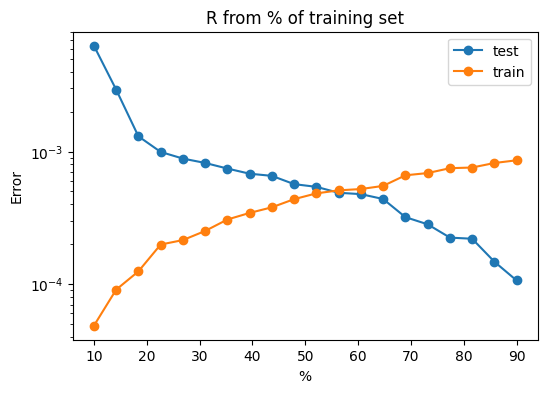

In [8]:
num_runs = 10
proportions = np.linspace(0.1, 0.9, 20)
errors_vs_size = []
errors_vs_size_train = []

for p in proportions:
    mses = []
    mses_train = []
    for _ in range(num_runs):
        current_split = int(p * len(X))
        idx = np.arange(len(X))
        np.random.shuffle(idx)
        train_idx_temp = idx[:current_split]
        test_idx_temp  = idx[current_split:]
        X_train_temp, Y_train_temp = X[train_idx_temp], Y[train_idx_temp]
        X_test_temp,  Y_test_temp  = X[test_idx_temp], Y[test_idx_temp]
        d_fixed = 5
        theta_temp = lsq(X_train_temp, Y_train_temp, d_fixed)
        mse_temp = R(theta_temp, X_test_temp, Y_test_temp)/ np.sqrt(S)
        mse_temp_train = R(theta_temp, X_train_temp, Y_train_temp) / np.sqrt(S)
        mses.append(mse_temp)
        mses_train.append(mse_temp_train)
    errors_vs_size.append(np.mean(mses))
    errors_vs_size_train.append(np.mean(mses_train))

plt.figure(figsize=(6,4))
plt.semilogy(proportions*100, errors_vs_size, marker='o', label='test')
plt.semilogy(proportions*100, errors_vs_size_train, marker='o', label='train')
plt.xlabel('%')
plt.ylabel('Error')
plt.legend()
plt.title('R from % of training set')
plt.show()



Теперь раздели датасет на 80% обучающей и 20% тестовой. Посмотрим на зависимость ошибки от степени полинома.

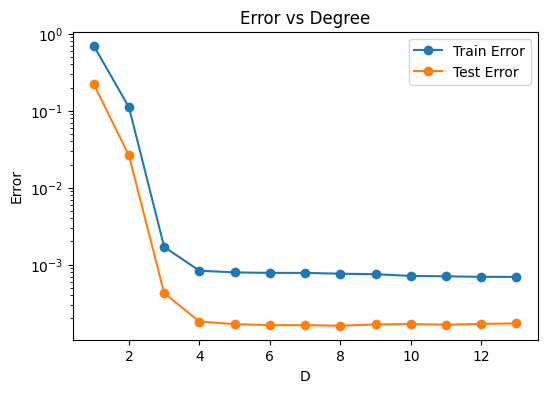

In [9]:
X_train = X[:int(0.8 * len(X))]
Y_train = Y[:int(0.8 * len(X))]
X_test = X[int(0.8 * len(X)):]
Y_test = Y[int(0.8 * len(X)):]

degrees = range(1, 14)
errors_vs_degree_train = []
errors_vs_degree_test = []

for dd in degrees:
    theta_dd = lsq(X_train, Y_train, dd)
    mse_train_dd = R(theta_dd, X_train, Y_train) / np.sqrt(S)
    mse_test_dd = R(theta_dd, X_test, Y_test) / np.sqrt(S)
    errors_vs_degree_train.append(mse_train_dd)
    errors_vs_degree_test.append(mse_test_dd)

plt.figure(figsize=(6, 4))
plt.semilogy(degrees, errors_vs_degree_train, marker='o', label='Train Error')
plt.semilogy(degrees, errors_vs_degree_test, marker='o', label='Test Error')
plt.xlabel('D')
plt.ylabel('Error')
plt.title('Error vs Degree')
plt.legend()
plt.show()


сравнить ошибки из рациональной и полинома - 

почему рациональная хуже полинома (если хуже?)



In [10]:
min_error = min(errors_vs_degree_test)
best_d = degrees[errors_vs_degree_test.index(min_error)]
print("Минимальная ошибка:", min_error)
print("Оптимальная степень полинома (D):", best_d)

Минимальная ошибка: 0.00016072487938524065
Оптимальная степень полинома (D): 8


Хм, видимо 4 самая оптимальная степень полинома, дальше либо все стабильно, либо кажется возрастает ошикба на тестовой выборке, т.е. возможно оверфиттинг.

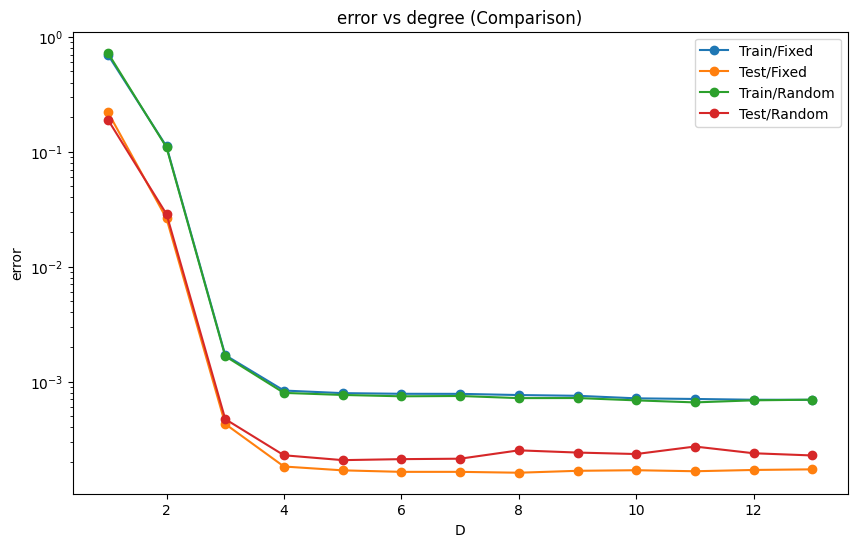

In [11]:
num_runs = 14  #
degrees = range(1, 14)  
errors_vs_degree_train_random = []
errors_vs_degree_test_random = []

for dd in degrees:
    mses_train_random = []
    mses_test_random = []
    for _ in range(num_runs):
        indices = np.arange(len(X))
        np.random.shuffle(indices)
        split_idx = int(0.8 * len(indices))
        train_idx = indices[:split_idx]
        test_idx = indices[split_idx:]
        X_train_random, Y_train_random = X[train_idx], Y[train_idx]
        X_test_random, Y_test_random = X[test_idx], Y[test_idx]
        theta_dd_random = lsq(X_train_random, Y_train_random, dd)
        mse_train_dd_random = R(theta_dd_random, X_train_random, Y_train_random) / np.sqrt(S)
        mse_test_dd_random = R(theta_dd_random, X_test_random, Y_test_random) / np.sqrt(S)
        mses_train_random.append(mse_train_dd_random)
        mses_test_random.append(mse_test_dd_random)
    
    errors_vs_degree_train_random.append(np.mean(mses_train_random))
    errors_vs_degree_test_random.append(np.mean(mses_test_random))

# Построение графиков
plt.figure(figsize=(10, 6))
plt.semilogy(degrees, errors_vs_degree_train, marker='o', label='Train/Fixed')
plt.semilogy(degrees, errors_vs_degree_test, marker='o', label='Test/Fixed')
plt.semilogy(degrees, errors_vs_degree_train_random, marker='o', label='Train/Random')
plt.semilogy(degrees, errors_vs_degree_test_random, marker='o', label='Test/Random')
plt.xlabel('D')
plt.ylabel('error')
plt.title('error vs degree (Comparison)')
plt.legend()
plt.show()

In the examples above we used explicit results of differentiation but in practice gradient calculation performed by computer. For example, [``autograd``](https://github.com/HIPS/autograd) package is a tool to automatically differentiate native Python and Numpy code.

**Example 5** Create data array, define function and calculate its gradient using autograd

In [12]:
# import autograd as ag
# function that perform scalar product of vectors 'x' with 'n' multiplied by 't'
def f(x,t):
    n = np.arange(x.shape[0]) # create 'n' vector as array of numbers from 0 to length of 'x'
    return np.sum(x*n)*t

x = np.random.randn(10) # take input data as array of 10 random values
t = 15 # parameter
print('f(x,t) =',f(x,t) )
# ag.grad(f,y) - provides a partial derivative of 'f' function with respect 'y' variable
df = ag.grad(f,0) #define gradient
print('df/dx = ',df(x,t))

f(x,t) = 31.27096521919162
df/dx =  [  0.  15.  30.  45.  60.  75.  90. 105. 120. 135.]


**Note**: autograd works with non integer arrays because you can not differentiate integer data.

There are some assumptions in previous consideration.

Firstly, in **least squares method** we assumed that we have a linear dependence from parameters but in the case of non-linear dependence we also need to use non-linear approximation.

**Problem 3.** Using [``autograd``](https://github.com/HIPS/autograd) package, try another non-linear approximation of $y(x)$, 
e.g. by [rational function](https://en.wikipedia.org/wiki/Rational_function) (see also [Padé approximant](https://en.wikipedia.org/wiki/Pad%C3%A9_approximant)). 

In [13]:
from autograd import grad
import autograd.numpy as np

def rational(x, params):
    a0, a1, a2, b0, b1 = params
    P = a0 + a1 * x + a2 * x**2 
    Q = 1 + b0 * x + b1 * x**2  
    return P / Q

def loss_f(params, x, y):
    return np.sum((y - rational(x, params))**2)

gradient = grad(loss_f, 0)  # Gradient of loss function with respect to params
params = np.array([1.0, 0.3, 0.1, 0.5, 0.01]) # Initial parameters for P and Q (split equally)

learning_rate = 0.1
num_iterations = 10000

for i in range(num_iterations):
    gradient_value = gradient(params, X_train, Y_train)
    params -= learning_rate * gradient_value  # Update parameters using gradient descent
    
    if (i+1) % 100 == 0:  # Output loss every 100 iterations
        loss = loss_f(params, X, Y)/np.sqrt(S)
        print(f"Iteration {i+1}, Loss: {loss:.6f}")

Y_fitted = rational(X, params)

Iteration 100, Loss: 0.087691
Iteration 200, Loss: 0.064132
Iteration 300, Loss: 0.051330
Iteration 400, Loss: 0.044335
Iteration 500, Loss: 0.040449
Iteration 600, Loss: 0.038213
Iteration 700, Loss: 0.036849
Iteration 800, Loss: 0.035945
Iteration 900, Loss: 0.035286
Iteration 1000, Loss: 0.034760
Iteration 1100, Loss: 0.034308
Iteration 1200, Loss: 0.033899
Iteration 1300, Loss: 0.033516
Iteration 1400, Loss: 0.033149
Iteration 1500, Loss: 0.032794
Iteration 1600, Loss: 0.032448
Iteration 1700, Loss: 0.032108
Iteration 1800, Loss: 0.031774
Iteration 1900, Loss: 0.031445
Iteration 2000, Loss: 0.031120
Iteration 2100, Loss: 0.030799
Iteration 2200, Loss: 0.030482
Iteration 2300, Loss: 0.030169
Iteration 2400, Loss: 0.029860
Iteration 2500, Loss: 0.029555
Iteration 2600, Loss: 0.029253
Iteration 2700, Loss: 0.028954
Iteration 2800, Loss: 0.028660
Iteration 2900, Loss: 0.028369
Iteration 3000, Loss: 0.028081
Iteration 3100, Loss: 0.027798
Iteration 3200, Loss: 0.027518
Iteration 3300, L

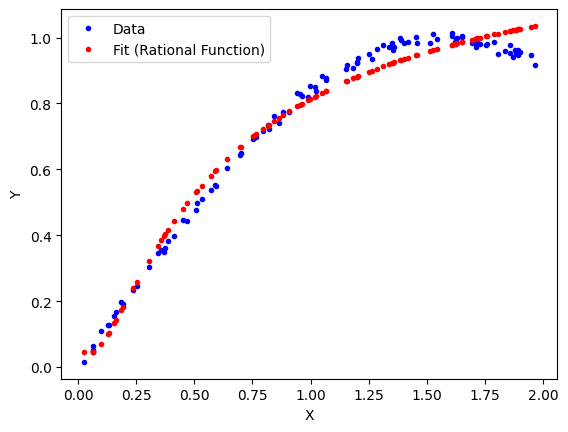

In [14]:
plt.plot(X, Y, '.b', label='Data')
plt.plot(X, Y_fitted, '.r', label='Fit (Rational Function)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

Secondly, we assumed that noise is a random value with normal probability distribution. 
Let p and q are probability distributions of random values 'x' and 'y'. The cross-entropy of this distribution can be defined as
$H(p,q) = -\sum_{x\in X} p(x)\, \log q(x)$

**Problem 4.** Try to use [cross-entropy](https://en.wikipedia.org/wiki/Cross_entropy) as a loss function to evaluate distribution of the error term $W=Y-f(X)$. 
Compare the result with the least squares method. 
Train the method using noise with any not normal probability distribution.

For example:

a) [Student's t-distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution) for noise $W$: $f_W (x) = \dfrac{\Gamma\left(\dfrac{\nu+1}{2}\right)} {\sqrt{\nu\pi}\,\Gamma\left(\dfrac{\nu}{2}\right)} \left(1+\dfrac{x^2}\nu \right)^{-(\nu+1)/2}$

b) Uniform distribution for noise $ f_W = \dfrac{1}{b-a}$ for $a<x<b$

В контексте обучения модели: с одной стороны у нас есть модель, которая предсказывает с плотностью распределения $q_f(X, \theta)$ - ее мы задаем сами, а есть распределение реальных ошибок $p_f$, которое мы не знаем ($q_f$ - получаем на основе тренирочного набора, а $p_f$ - уже при тесте). Тогда в качестве лосс-функции можем рассмотреть следующую формулу кросс-энтропии:
$$
H(X,q) = - \frac{1}{n} \sum^n_{i=1} \log q_f(x_i, \theta)
$$

Тогда цель обучения - минимизация кросс-энтропии. Как и в предыдущем пункте будем использовать рациональную функуию, которая задает зависимость от вектора параметров.

iter 100, cross-entropy loss: 1.016413
iter 200, cross-entropy loss: 1.009608
iter 300, cross-entropy loss: 1.006308
iter 400, cross-entropy loss: 1.004414
iter 500, cross-entropy loss: 1.003254
iter 600, cross-entropy loss: 1.002517
iter 700, cross-entropy loss: 1.002038
iter 800, cross-entropy loss: 1.001724
iter 900, cross-entropy loss: 1.001515
iter 1000, cross-entropy loss: 1.001377
iter 1100, cross-entropy loss: 1.001285
iter 1200, cross-entropy loss: 1.001225
iter 1300, cross-entropy loss: 1.001185
iter 1400, cross-entropy loss: 1.001160
iter 1500, cross-entropy loss: 1.001144
iter 1600, cross-entropy loss: 1.001134
iter 1700, cross-entropy loss: 1.001128
iter 1800, cross-entropy loss: 1.001125
iter 1900, cross-entropy loss: 1.001123
iter 2000, cross-entropy loss: 1.001122
iter 2100, cross-entropy loss: 1.001122
iter 2200, cross-entropy loss: 1.001122
iter 2300, cross-entropy loss: 1.001121
iter 2400, cross-entropy loss: 1.001121
iter 2500, cross-entropy loss: 1.001120
iter 2600

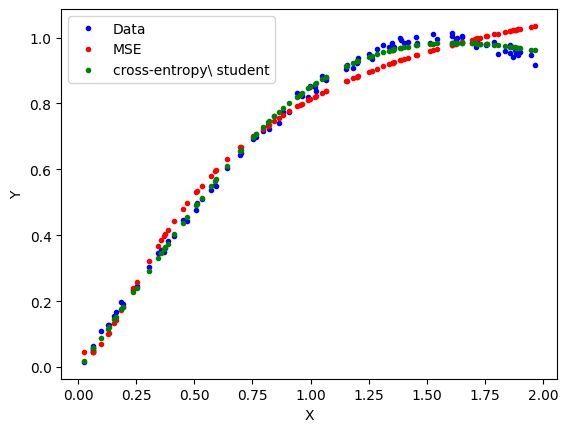

In [31]:
from scipy.special import gamma


def student_t(x, nu):
    coefficient = gamma((nu + 1) / 2) / (np.sqrt(nu * np.pi) * gamma(nu / 2))
    return coefficient * (1 + (x**2) / nu) ** (-(nu + 1) / 2)


def cross_entropy_loss(params, x, y, pdf, *pdf_args):
    residuals = y - rational(x, params)
    probabilities = pdf(residuals, *pdf_args)
    # probabilities = np.clip(probabilities, 1e-10, None)  # Avoid log(0)
    return -np.sum(np.log(probabilities))/len(x)


nu = 3 
gradient_ce = grad(cross_entropy_loss, 0)
params_ce = np.array([1.0, 0.3, 0.1, 0.5, 0.01])  # н
learning_rate_ce = 0.1
num_iterations_ce = 10000

for i in range(num_iterations_ce):
    gradient_value_ce = gradient_ce(params_ce, X_train, Y_train, student_t, nu)
    params_ce -= learning_rate_ce * gradient_value_ce 
    
    if (i + 1) % 100 == 0:
        loss_ce = cross_entropy_loss(params_ce, X_test, Y_test, student_t, nu)
        print(f"iter {i + 1}, cross-entropy loss: {loss_ce:.6f}")

Y_fitted_ce = rational(X, params_ce)
plt.plot(X, Y, '.b', label='Data')
plt.plot(X, Y_fitted, '.r', label='MSE')
plt.plot(X, Y_fitted_ce, '.g', label="cross-entropy\\ student")

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

Iteration 10000, Cross-Entropy Loss (Student's t): 1.291884, nu: 1.00
Iteration 10000, Cross-Entropy Loss (Student's t): 1.284868, nu: 1.00
Iteration 10000, Cross-Entropy Loss (Student's t): 1.278704, nu: 1.00
Iteration 10000, Cross-Entropy Loss (Student's t): 1.272976, nu: 1.00
Iteration 10000, Cross-Entropy Loss (Student's t): 1.267546, nu: 1.00
Iteration 10000, Cross-Entropy Loss (Student's t): 1.262362, nu: 1.00
Iteration 10000, Cross-Entropy Loss (Student's t): 1.257403, nu: 1.00
Iteration 10000, Cross-Entropy Loss (Student's t): 1.252659, nu: 1.00
Iteration 10000, Cross-Entropy Loss (Student's t): 1.248126, nu: 1.00
Iteration 10000, Cross-Entropy Loss (Student's t): 1.243798, nu: 1.00
Iteration 10000, Cross-Entropy Loss (Student's t): 1.239672, nu: 1.00
Iteration 10000, Cross-Entropy Loss (Student's t): 1.235743, nu: 1.00
Iteration 10000, Cross-Entropy Loss (Student's t): 1.232007, nu: 1.00
Iteration 10000, Cross-Entropy Loss (Student's t): 1.228458, nu: 1.00
Iteration 10000, Cro

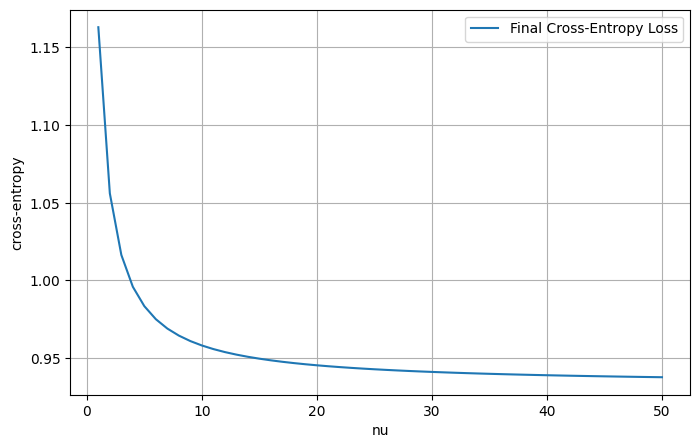

min cross-entropy: 0.937720


In [42]:
nu_values = np.linspace(1, 50, 50, dtype=int)
final_cross_entropy_losses = []

for nu in nu_values:

    params_ce_temp = np.array([1.0, 0.3, 0.1, 0.5, 0.01])  
    learning_rate_ce_temp = 0.1
    num_iterations_ce_temp = 100


    for _ in range(num_iterations_ce_temp):
        gradient_value_ce_temp = gradient_ce(params_ce_temp, X_train, Y_train, student_t, nu)
        params_ce_temp -= learning_rate_ce_temp * gradient_value_ce_temp
        if (i + 1) % 100 == 0:
            loss_ce = cross_entropy_loss(params_ce_temp, X_test, Y_test, student_t, nu)
            print(f"Iteration {i + 1}, Cross-Entropy Loss (Student's t): {loss_ce:.6f}, nu: {nu:.2f}")

    final_loss_ce = cross_entropy_loss(params_ce_temp, X_test, Y_test, student_t, nu)
    final_cross_entropy_losses.append(final_loss_ce)



plt.figure(figsize=(8, 5))
plt.plot(nu_values, final_cross_entropy_losses, label='Final Cross-Entropy Loss')
plt.xlabel('nu')
plt.ylabel('cross-entropy')
plt.legend()
plt.grid()
plt.show()

print(f"min cross-entropy: {np.min(final_cross_entropy_losses):.6f}")

почему так от ню именно такая зависимость? что картинка дает понять

**Quick recap**
1) Define model
2) Separate data on training and testing parts
3) Calculate gradient (for example, using autograd)
4) Optimize 
5) Check overfitting (for example cross-validation)

**Example 6** Find optimal value of parameter $\theta$ where minimum of Loss function $R(x,y,\theta)$ is achieved using autograd.

Here we will use loss function from **Example 3** defined as a mean square error.
We start from definition of a gradient and then introduce optimization function

In [15]:
dR = ag.grad(fun=R, argnum=0)
# print( R(theta_optimal, X, Y) )
print( dR(theta_optimal, X, Y) )
print( dR(theta_lsq, X, Y) )

ValueError: operands could not be broadcast together with shapes (100,) (6,) 

In [ ]:
theta0 = theta_optimal

def optimize(x,y, theta, alpha, tol=1e-6, maxiter=10000):
  for it in range(maxiter):
    loss = R(theta=theta, x=x, y=y)
    dloss = dR(theta, x, y)
    norm_dloss = np.linalg.norm(dloss.flatten())
    if it%100 == 0:
      print(f"{it}: {loss} {norm_dloss}")
    if norm_dloss<tol: return theta
    theta = theta - alpha*dloss
  return theta

In [ ]:
theta0 = optimize(x=X, y=Y, theta=theta0, alpha=5e-5)
print(theta0) 

ValueError: operands could not be broadcast together with shapes (100,) (6,) 